`conda install matplotlib`

In [1]:
import enum
import pickle
from pprint import pprint

import matplotlib.pyplot as plt
import pandas as pd

#matplotlib inline

In [2]:
df = pd.read_csv('../data/raw/reviews.csv')

In [3]:
df

rating                                             review
0          50  This is one of the best hotels I've ever staye...
1          50  Everything about this hotel was awesome. The s...
2          50  Our tour group stayed here for two nights.  Th...
3          50  Excellent service at Porta Hotel Antigua. From...
4          50  I almost always stay at Hotel Antigua when I t...
...       ...                                                ...
15677      40  Last week I stayed at the Camino Real in Antig...
15678      50  My boyfriend was in Guate on business and we d...
15679      40  I stayed at Camino Real Antigua for a conferen...
15680      50  Was in Antigua for the weekend, attending an A...
15681      40  very nice little hotel, brand new, with lots o...

[15682 rows x 2 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15682 entries, 0 to 15681
Data columns (total 2 columns):
rating    15682 non-null int64
review    15682 non-null object
dtypes: int64(1), object(1)
memory usage: 245.2+ KB


In [5]:
df['review']

0        This is one of the best hotels I've ever staye...
1        Everything about this hotel was awesome. The s...
2        Our tour group stayed here for two nights.  Th...
3        Excellent service at Porta Hotel Antigua. From...
4        I almost always stay at Hotel Antigua when I t...
                               ...                        
15677    Last week I stayed at the Camino Real in Antig...
15678    My boyfriend was in Guate on business and we d...
15679    I stayed at Camino Real Antigua for a conferen...
15680    Was in Antigua for the weekend, attending an A...
15681    very nice little hotel, brand new, with lots o...
Name: review, Length: 15682, dtype: object

In [6]:
df['rating'] = df['rating'].astype(dtype='int64')

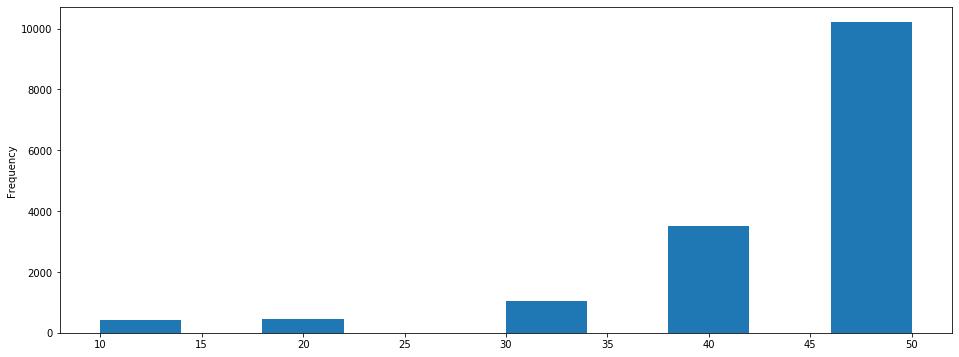

In [7]:
fig = plt.figure(figsize=(16,6))
df['rating'].plot.hist()

In [8]:
df.groupby('rating').count()

review
rating        
10         428
20         456
30        1060
40        3525
50       10213

In [9]:
class Sentiments(enum.Enum):
    POS = 'POS'
    NEG = 'NEG'

In [10]:
df['sentiment'] = df['rating'].apply(lambda x: Sentiments.POS if x >= 40 else Sentiments.NEG)

In [11]:
df

rating                                             review  \
0          50  This is one of the best hotels I've ever staye...   
1          50  Everything about this hotel was awesome. The s...   
2          50  Our tour group stayed here for two nights.  Th...   
3          50  Excellent service at Porta Hotel Antigua. From...   
4          50  I almost always stay at Hotel Antigua when I t...   
...       ...                                                ...   
15677      40  Last week I stayed at the Camino Real in Antig...   
15678      50  My boyfriend was in Guate on business and we d...   
15679      40  I stayed at Camino Real Antigua for a conferen...   
15680      50  Was in Antigua for the weekend, attending an A...   
15681      40  very nice little hotel, brand new, with lots o...   

            sentiment  
0      Sentiments.POS  
1      Sentiments.POS  
2      Sentiments.POS  
3      Sentiments.POS  
4      Sentiments.POS  
...               ...  
15677  Sentiments.POS  
15678  Sentiments.POS  
15679  Sentiments.POS  
15680  Sentiments.POS  
15681  Sentiments.POS  

[15682 rows x 3 columns]

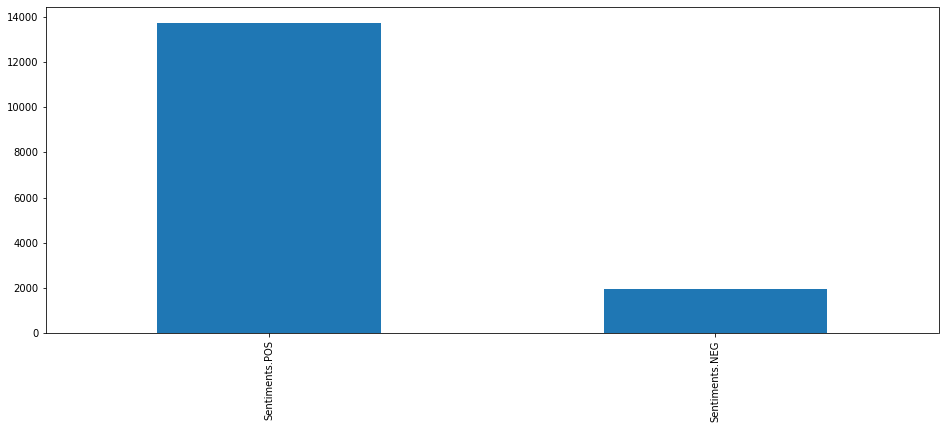

In [12]:
fig = plt.figure(figsize=(16,6))
df['sentiment'].value_counts().plot(kind='bar')

In [13]:
df['sentiment'].value_counts()

Sentiments.POS    13738
Sentiments.NEG     1944
Name: sentiment, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15682 entries, 0 to 15681
Data columns (total 3 columns):
rating       15682 non-null int64
review       15682 non-null object
sentiment    15682 non-null object
dtypes: int64(1), object(2)
memory usage: 367.7+ KB


In [15]:
data_classes = {sentiment.value: df[df['sentiment'] == sentiment]['review'].values.tolist() for sentiment in Sentiments}

In [16]:
pprint(data_classes['NEG'])

['Good location on the NW of town, especially if youre going to Antiguena '
 'spanish school. 100q for good sized private twin room with shared bathroom - '
 'great price Nice ish garden with a swing and hamock Basic bathrooms - very '
 'tatty but has hot showers always (if you keep the water flow slow) Super '
 'basic, pretty dirty kitchenette Loads of cats and dogs  Its very cheap and '
 'basic. If thats what your after, its ok',
 'We went to the hotel directly to book a room. The receptionist at first gave '
 'us a really high price then lowered it. When we asked how much it costs in '
 'qetales she gave us an 8.2 comission rate to dollars and I knew she was '
 'randomly goving us a non existing rate so then she "lowered" it to the real '
 'rate. After we agreed that the price includes breakfast the following '
 'morning we get to breakfast and received two plain pieces of toast and fruit '
 'while theother tables received also eggs and plantines. So I asked if we '
 'also get eggs 

 'and conditions i can not show them.   Who ever books this hotel, bring your '
 'own sheets and towels.....this is not a friendly oriented place to stay....I '
 'rather have stayed in a hostel where is actually',
 'Bring your own towels & bedsheets and get ready to purchase water for '
 'Q40.00.  Beds are old and smelly not close to the central part of Antigua.  '
 'I’m extremely disappointed, this place doesn’t fit 6 people confortable. ',
 "Terrible costumer service, isn't even an office or somebody professional or "
 "serious. This lady is totally rude. It's my second attempt to have a "
 'vacation at this place. First experience last New Years, I booked a Villa '
 'trough Booking.com, when I arrived to the location they overbooked the '
 'Villas and I lost mine. They gave me something different for the same price. '
 'Some Villas are nice with good stuff and other ones are dusty, old '
 'appliances or kitchen utensils. If you are lucky you will get a  good one.  '
 'Second bad exp

 'would recommend some of the other places on 1st ave - they are cheaper, '
 "don't include breakfast, but breakfast is cheap so it's worth it to stay "
 'there.',
 'Posada Ruiz #2 was our second hostel in Antigua.  It is quite basic with two '
 'outdoor sinks and no soap or towels available.  The showerheads are wired '
 'with heaters but they were inoperable at the time of our visit, so we '
 'showered cold.  We stayed three nights and were woken by loud music and '
 'crying babies several times.  The mattresses were beat-up but of higher '
 'quality than those at Kafka or Jungle Party.  Double rooms have electrical '
 'outlets but singles are plugless.  Despite its problems, Posada Ruiz '
 'provided good value at the very bottom of the lodging market.  For 40Q/night '
 "for a single, I'd stay there again.",
 'We booked a cheap room and got a single bed for two persons. It was really '
 "really small.. although we normally don't mind this kinda stuff as most of "
 'the time you will 

 'nice place to stay, but it was a bit basic for the price ($85 per night) - '
 'rooms are fairly basic, but still quite pretty/romantic with exposed '
 "brickwork and beams.  It's also a bit out of the central part of the town. "
 'It does have a beautiful and peaceful roof terrace and the staff were very '
 "friendly and did a fantastic breakfast.  Unfortunately the staff didn't "
 'speak a word of English, which was a little disappointing given that email '
 'exchanges had all been in English and the price was at the premium end of '
 'the hotel market in the town. We had experience of 3 other hotels all on 3a '
 'calle poniente and each of those had staff who could speak at least some '
 "English, so if you don't speak any spanish at all this might not be the best "
 'place to stay! If you do stay then the biggest',
 'I stayed 3 nights. Room without window - if one does not count with the '
 'bathroom  window facing a courtyard. The outside of the hotel looks very '
 'nice, the gar

 'The hotel is in typical colonian building that gives the possibility to '
 'create the unique atmosphere. The hotel patio is very nice and the exteriors '
 'are pleasant - pool, the place to sit and relax, restaurant. Friendly staff. '
 'The room was rather small, with two single beds. Very small, but clean '
 'bathroom. Not enough space in the room to keep two suitcases. Hotel located '
 'in walking distance from the main square. Hotel secured, so we felt safe.',
 'The hotel has potential: service is good and environment is pleasant. '
 'However, sometimes one cannot get hot water. Breakfest is good, with typical '
 'and continental options. Location is not perfect, walking at night is not '
 'recommended, but nothing a cab cant solve. I would recommend only if you '
 'dont mind taking a cold shower.',
 'My family rented all of the 8 rooms of Hotel Mil Flores in Antigua Guatemala '
 "for the weekend of November 25th. on the ocassion of my daughter's wedding.  "
 'I had a very bad ex

 'anyone actually using it except while waiting for a shuttle to leave. The '
 'not- so-good thing is that while all the rooms have the same price, they '
 'vary widely in quality. Our first night we ended up in a small, dark, musty '
 'and freezing room with 2 beds, one of which had a bad mattress. On the next '
 'day, after hard negotiation we were moved to a much better room. This issue '
 "makes the hotel a risky proposition as you cannot tell what you'll get if "
 'you book on the Internet. I would recommend staying here only if you can '
 'physically be there to choose a room.',
 "For Q320 a night it's good value. It's a hotel, not a hostel. No dorm rooms. "
 'All private bathroom rooms, which are dated but perfectly fine and clean. '
 'Location is great in the middle of town and the bars /restaurants.   '
 'Reception were very friendly and helpful. We extended our stay we were happy '
 'with the service. No breakfast on offer, but no real problem.   The biggest '
 'problem was t

 'ours  204 which was at the bottom of the stairs',
 'We arrived at approximately 8pm last night after a long day traveling from '
 'Dublin. Hotel el Carmen instantly gave us the warm and inviting feeling. We '
 'were warmly greeted at check in and given our room key and WiFi information. '
 'When we got to our room I noticed it was right at the street on the second '
 'floor. When we were going out for dinner I expressed my concerns at the '
 'front desk. There were no alternative room available for last night, but I’m '
 'assured of another room tomorrow night.......210 is a well appointed and '
 'inviting room, but unfortunately every sound, and I mean, every sound from '
 'the street can be heard in the room. It’s 2:18 am as I type this, so far '
 'tonight I’ve heard cars, buses, motorcycles, party people and even couples '
 'having sex. Avoid room 210 at all costs-',
 'Am not one to write reviews but feel that I have to share our bad experience '
 'at this hotel. We were booked fo

 'hotels in the vicinity. ',
 'Perfectly located - close to the main area but far enough away to get a '
 '"neighbourhood feel". Staff was very friendly and helped us out when we were '
 'mistakenly taken to the wrong hotel. Our room  were larger than expected and '
 'was comfortable for what we needed.  a nice courtyard allowed for some '
 'escape from the heat. the only negative, and its not major,  is based on the '
 'layout- our room was on the ground floor facing the courtyard, so we could '
 'hear people returning/leaving  their rooms at night, noisy conversations '
 'etc. again minor issue and nothing that impacted our stay in Antigua. wished '
 'we had a longer stay.',
 "Yes, those older (2008) bad reviews are still true, read them if you don't "
 'believe me.  Positives - The room was not very clean (by first world '
 'standards), but still acceptable.  The included breakfast was decent.  The '
 'location is great - the middle of the town.  Negatives - Room windows face '
 'in

 'were on the main floor facing the street and our only window that opened '
 "faced a busy street so we couldn't open that ever due to privacy issues, "
 'making our room very stuffy and hot.  There is no A/C.  They did finally '
 'give us a fan which helped slightly.  The room literally shook from the cars '
 'going by and it was very hard to sleep',
 'The location and setting of the hostel are beautiful. There are trails '
 'criss-crossing the mountains surrounding the property, and an entire day can '
 'be spent exploring the forests.  Wifi is average; Skype connection with '
 'video was not possible. Also, wifi is disconnected from 7pm until about '
 '7:30am.  The kitchen shuts at 3pm and the only available food after that is '
 'nachos or the communal dinner, which is quite expensive (it costs as much as '
 'some of the accommodation options). It is not allowed to eat your own food '
 'in the general hang-out area.  When I stayed there, there was a party '
 'atmosphere, which mad

 'send an email. I explained that I had already tried and never received a '
 'response, but did so again anyway and received a prompt reply.   In trying '
 'to secure a reservation, they wanted the full stay paid for upfront via '
 'PayPal. Normally this kind of thing raises red',
 'This property has such potential but is missing something.   We stayed for 3 '
 'nights.  On the plus side, the rooms were spacious with vaulted ceilings, '
 'kitchenette, living room, and one bedroom.  Great televisions in both living '
 'room and bedroom.  good maid staff (friendly).  Negatives:  outdated decor, '
 'carpet is well-used, no in-room coffee service (which would be a nice '
 'touch), front desk staff.  I was most disappointed with the front desk staff '
 'who were not very friendly (no eye contact) and non responsive to my '
 'requests.  The hotel offers a "free" shuttle service but only 3 times a day '
 'and only to the central square in Antigua.  Any deviations from this and '
 'they will 

In [17]:
with open(r"../data/interim/review_classes.pkl", "wb") as output_file:
    pickle.dump(data_classes, output_file)

In [18]:
data_classes['NEG']

['Good location on the NW of town, especially if youre going to Antiguena spanish school. 100q for good sized private twin room with shared bathroom - great price Nice ish garden with a swing and hamock Basic bathrooms - very tatty but has hot showers always (if you keep the water flow slow) Super basic, pretty dirty kitchenette Loads of cats and dogs  Its very cheap and basic. If thats what your after, its ok',
 'We went to the hotel directly to book a room. The receptionist at first gave us a really high price then lowered it. When we asked how much it costs in qetales she gave us an 8.2 comission rate to dollars and I knew she was randomly goving us a non existing rate so then she "lowered" it to the real rate. After we agreed that the price includes breakfast the following morning we get to breakfast and received two plain pieces of toast and fruit while theother tables received also eggs and plantines. So I asked if we also get eggs abd plantines and she replied "no". How come we 

$$f_1 = \frac{2 R P}{R + P}$$

0 100

100 0